In [1]:
import os
import sys
import json
from tqdm import tqdm_notebook as tqdm
from pprint import pprint

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
BASE_DIR = '../mnt/inputs/origin'
TRN_BASE_DIR = '../mnt/inputs/features/train'
TST_BASE_DIR = '../mnt/inputs/features/test'
# BASE_DIR = '../mnt/inputs/features/test'

In [3]:
trn_df = pd.read_pickle(f'{BASE_DIR}/train.pkl.gz')
trn_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [4]:
tst_df = pd.read_csv(f'{BASE_DIR}/test.csv')
tst_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [5]:
label_df = pd.read_csv('../mnt/inputs/origin/train_labels.csv')
label_df.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [16]:
sub_df = pd.read_csv('../mnt/inputs/origin/sample_submission.csv')
sub_df.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,3
3,01a44906,3
4,01bc6cb6,3


## 系列長見てみる

In [69]:
# trn_cnt_df = trn_df[
#     trn_df.installation_id.isin(label_df.installation_id.unique())
# ].groupby(['installation_id']).apply(lambda x: x.groupby('game_session').timestamp.max().sort_values().rolling(10000, min_periods=1).count()).reset_index()
# 
# 
# 
# tst_cnt_df = tst_df.groupby(['installation_id']).apply(lambda x: x.groupby('game_session').timestamp.max().sort_values().rolling(10000, min_periods=1).count()).reset_index()

In [103]:
trn_cnt_df = trn_df[
    (trn_df.type == 'Assessment')
            & (
                ((trn_df.event_code == 4100)
                 & (trn_df.title != 'Bird Measurer (Assessment)'))
                | ((trn_df.event_code == 4110)
                   & (trn_df.title == 'Bird Measurer (Assessment)'))
            )
    ].groupby(['installation_id']).apply(lambda x: x.groupby('game_session').timestamp.max().sort_values().rolling(10000, min_periods=1).count()).reset_index()



tst_cnt_df = tst_df[
    (tst_df.type == 'Assessment')
            & (
                ((tst_df.event_code == 4100)
                 & (tst_df.title != 'Bird Measurer (Assessment)'))
                | ((tst_df.event_code == 4110)
                   & (tst_df.title == 'Bird Measurer (Assessment)'))
            )
    ].groupby(['installation_id']).apply(lambda x: x.groupby('game_session').timestamp.max().sort_values().rolling(10000, min_periods=1).count()).reset_index()

In [104]:
trn_cnt_df = trn_cnt_df.rename(columns={'timestamp': 'session_len'}).reset_index()
tst_cnt_df = tst_cnt_df.rename(columns={'timestamp': 'session_len'}).reset_index()

In [105]:
tst_cnt_df = tst_cnt_df.sort_values(['installation_id', 'game_session', 'session_len']).drop_duplicates('installation_id', keep='last')

In [106]:
max_len = int(max(trn_cnt_df.session_len.max(), tst_cnt_df.session_len.max()))

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


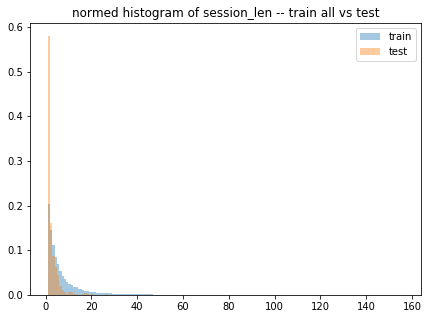

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

bins = np.linspace(1, max_len, max_len)
ax.hist(trn_cnt_df.session_len, bins=bins, alpha=0.4, label='train', normed=True)
ax.hist(tst_cnt_df.session_len, bins=bins, alpha=0.4, label='test', normed=True)

ax.set_title('normed histogram of session_len -- train all vs test')
ax.legend()

In [108]:
dropped_session_len = trn_cnt_df[trn_cnt_df.game_session.isin(label_df.game_session)].sort_values(['installation_id', 'game_session', 'session_len']).drop_duplicates('installation_id', keep='last').session_len

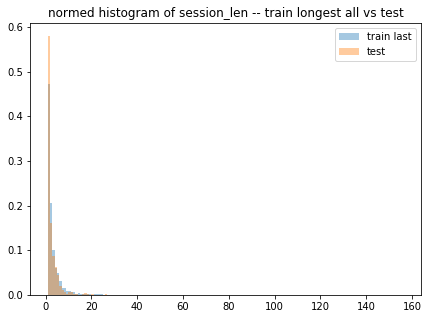

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

bins = np.linspace(1, max_len, max_len)
ax.hist(dropped_session_len, bins=bins, alpha=0.4, label='train last', normed=True)
ax.hist(tst_cnt_df.session_len, bins=bins, alpha=0.4, label='test', normed=True)

ax.set_title('normed histogram of session_len -- train longest all vs test')
ax.legend()

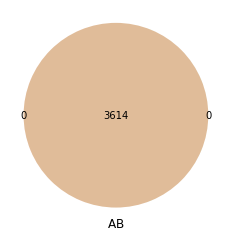

In [110]:
import matplotlib_venn
matplotlib_venn.venn2(
    [
        set(trn_cnt_df.sort_values(['installation_id', 'game_session', 'session_len']).drop_duplicates('installation_id', keep='last').game_session),
        set(trn_cnt_df[trn_cnt_df.game_session.isin(label_df.game_session)].sort_values(['installation_id', 'game_session', 'session_len']).drop_duplicates('installation_id', keep='last').game_session)
     ]
)

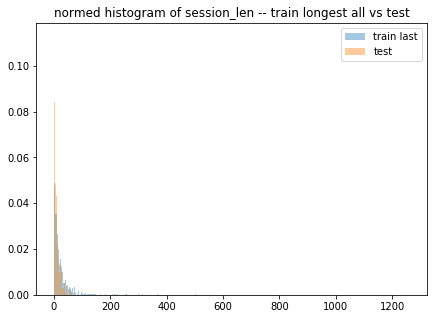

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

bins = np.linspace(1, max_len, max_len)
ax.hist(, bins=bins, alpha=0.4, label='train last', normed=True)
ax.hist(tst_cnt_df.session_len, bins=bins, alpha=0.4, label='test', normed=True)

ax.set_title('normed histogram of session_len -- train longest all vs test')
ax.legend()

In [94]:
a = trn_cnt_df[trn_cnt_df.game_session.isin(label_df.game_session)].sort_values(['installation_id', 'game_session', 'session_len']).drop_duplicates('installation_id', keep='last')
a.type.value_counts()

Game          70918
Activity      66177
Assessment    22861
Clip           1839
Name: type, dtype: int64

In [88]:
trn_cnt_df.shape, tst_cnt_df.shape

((175467, 4), (1000, 4))

In [77]:
trn_analysis_df.session_len.value_counts()

11.0      445
8.0       422
7.0       401
12.0      397
10.0      394
         ... 
1119.0      1
275.0       1
455.0       1
647.0       1
413.0       1
Name: session_len, Length: 644, dtype: int64

In [ ]:
trn_cnt_df_2 = trn_df[trn_df.installation_id.isin(label_df.installation_id.unique())].groupby(['installation_id']).apply(lambda x: x.groupby('game_session').timestamp.max().sort_values()).reset_index()

In [53]:
trn_cnt_df_2 = trn_cnt_df_2.merge(trn_cnt_df, on=['installation_id', 'game_session'], how='left')
trn_cnt_df_2 = trn_cnt_df_2.sort_values(['installation_id', 'game_session', 'timestamp_max']).drop_duplicates('installation_id', keep='last')
trn_cnt_df_2.head()

,installation_id,game_session,timestamp_max,timestamp
58,0006a69f,fbe9d0c5478ecfc6,2019-08-06T20:53:52.621Z,59.0
101,0006c192,fa6560f04b64714c,2019-09-14T15:31:47.288Z,22.0
132,00129856,ff48f8654fa01dae,2019-09-22T16:36:13.558Z,3.0
144,001d0ed0,f254185e012e45a8,2019-09-05T13:57:19.109Z,6.0
191,00225f67,fe34349639799cd6,2019-10-05T23:48:27.823Z,1.0
